# Business Objective
This is a dataset taken from <b>UCI Machine Learning</b> repository
<br>
Link: https://archive.ics.uci.edu/ml/datasets/Insurance+Company+Benchmark+%28COIL+2000%29
<br>
<b>Data Set Information:</b>
<br>
Information about customers consists of <font color="red">86</font> variables and includes product usage data and socio-demographic data derived from zip area codes. The data was supplied by the <font color="red">Dutch data mining company Sentient Machine Research</font> and is based on a real world business problem. The training set contains over <font color="red">5000</font> descriptions of customers, including the information of whether or not they have a caravan insurance policy. A test set contains <font color="red">4000</font> customers of whom only the organisers know if they have a caravan insurance policy.
<br>
<br>
<b>Objective:</b> Our objective is to predict whether a customer will like a "Caravan policy"
<br>
## How this dataset will address our idea in Accenture Innovation contest?
In this contest we addressed the challenge faced by Indian insurance companies to chose the right product for the right customer. This sample POC has a similar business objective where we are trying to predict whether a customer with a particular feature will like a particular product (in our case "A Caravan Policy) or not.

In [70]:
import pandas as pd
import os
import tarfile
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
path = r'F:\Machine learning\Accenture Innovation'
os.chdir(path)

# Visualizing the training dataset
## Dataset description
<b>Below is the description of the data columns </b>

In [3]:
dictionary = open('dictionary.txt','r')
print(dictionary.read())

DATA DICTIONARY

Nr Name Description Domain
1 MOSTYPE Customer Subtype see L0
2 MAANTHUI Number of houses 1 – 10
3 MGEMOMV Avg size household 1 – 6
4 MGEMLEEF Avg age see L1
5 MOSHOOFD Customer main type see L2
6 MGODRK Roman catholic see L3
7 MGODPR Protestant ...
8 MGODOV Other religion
9 MGODGE No religion
10 MRELGE Married
11 MRELSA Living together
12 MRELOV Other relation
13 MFALLEEN Singles
14 MFGEKIND Household without children
15 MFWEKIND Household with children
16 MOPLHOOG High level education
17 MOPLMIDD Medium level education
18 MOPLLAAG Lower level education
19 MBERHOOG High status
20 MBERZELF Entrepreneur
21 MBERBOER Farmer
22 MBERMIDD Middle management
23 MBERARBG Skilled labourers
24 MBERARBO Unskilled labourers
25 MSKA Social class A
26 MSKB1 Social class B1
27 MSKB2 Social class B2
28 MSKC Social class C
29 MSKD Social class D
30 MHHUUR Rented house
31 MHKOOP Home owners
32 MAUT1 1 car
33 MAUT2 2 cars
34 MAUT0 No car
35 MZFONDS National Health Service
36 MZPART Private

## File descriptions
<b>TICDATA2000.txt:</b> Dataset to train and validate prediction models and build a description (5822 customer records). Each record consists of 86 attributes, containing sociodemographic data (attribute 1-43) and product ownership (attributes 44-86).The sociodemographic data is derived from zip codes. All customers living in areas with the same zip code have the same sociodemographic attributes. Attribute 86, "CARAVAN:Number of mobile home policies", is the target variable. 
<br>
<br>
<b>TICEVAL2000.txt:</b> Dataset for predictions (4000 customer records). It has the same format as TICDATA2000.txt, only the target is missing. Participants are supposed to return the list of predicted targets only. All datasets are in tab delimited format. The meaning of the attributes and attribute values is given below. 
<br>
<br>
<b>TICTGTS2000.txt:</b> Targets for the evaluation set. 
<br><br>
<b>Note:</b><br>
Every dataset is Tab delimited. All the variables are cleaned and also the categorical variables are encoded/hot encoded as required. There is no missing data that is to be handled in this example. In real life missing data preprocessing is the elementary step before building ML models. In this POC we can directly move to Exploratory Data Analysis and then model building

We have stored the column headings to a separate file 'headings.csv' and added the column names to our dataset. This will be beneficial for data analysis.
<br>
## Visualize first 5 rows of training dataset

In [4]:
headings = pd.read_csv('headings.csv')
train = pd.read_csv('ticdata2000.txt',sep='\t',names=headings.Name)
test = pd.read_csv('ticeval2000.txt',sep='\t',names=headings.Name[:-1])
train.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


## Visualize the distribution of variables
We shall visualize the distribution charts of the Independent variables in different parts.
<br>
All variables cannot be put into our machine learning algorithm. Data of some variables might be too much skewed which will cause algorithm to be biased

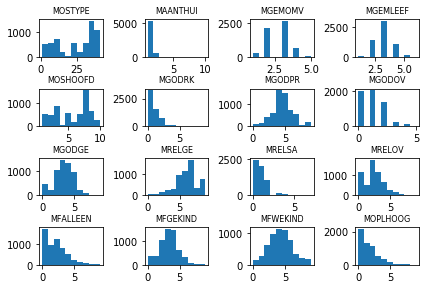

In [5]:
%matplotlib inline
nrows = 4
ncols = 4
fig, axs = plt.subplots(nrows,ncols,squeeze = False)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
data = 0
for i in range(0,nrows):
    for j in range(0,ncols):
        axs[i,j].hist(train.iloc[:,data].values)
        axs[i,j].set_title(train.columns[data], fontdict={'fontsize':8})
        data+=1
plt.show()

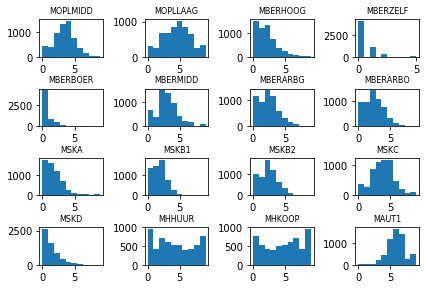

In [6]:
%matplotlib inline
nrows = 4
ncols = 4
fig, axs = plt.subplots(nrows,ncols,squeeze = False)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
for i in range(0,nrows):
    for j in range(0,ncols):
        axs[i,j].hist(train.iloc[:,data].values)
        axs[i,j].set_title(train.columns[data], fontdict={'fontsize':8})
        data+=1
plt.show()

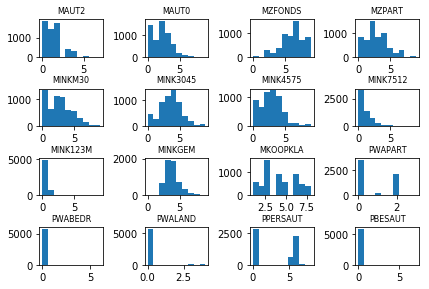

In [7]:
%matplotlib inline
nrows = 4
ncols = 4
fig, axs = plt.subplots(nrows,ncols,squeeze = False)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
for i in range(0,nrows):
    for j in range(0,ncols):
        axs[i,j].hist(train.iloc[:,data].values)
        axs[i,j].set_title(train.columns[data], fontdict={'fontsize':8})
        data+=1
plt.show()

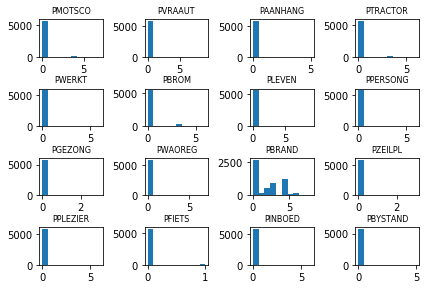

In [8]:
%matplotlib inline
nrows = 4
ncols = 4
fig, axs = plt.subplots(nrows,ncols,squeeze = False)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
for i in range(0,nrows):
    for j in range(0,ncols):
        axs[i,j].hist(train.iloc[:,data].values)
        axs[i,j].set_title(train.columns[data], fontdict={'fontsize':8})
        data+=1
plt.show()

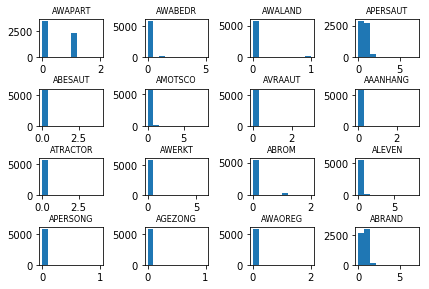

In [9]:
%matplotlib inline
nrows = 4
ncols = 4
fig, axs = plt.subplots(nrows,ncols,squeeze = False)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
for i in range(0,nrows):
    for j in range(0,ncols):
        axs[i,j].hist(train.iloc[:,data].values)
        axs[i,j].set_title(train.columns[data], fontdict={'fontsize':8})
        data+=1
plt.show()

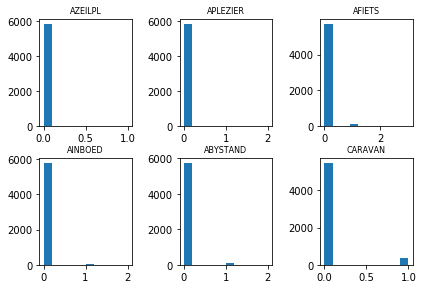

In [10]:
%matplotlib inline
nrows = 2
ncols = 3
fig, axs = plt.subplots(nrows,ncols,squeeze = False)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
for i in range(0,nrows):
    for j in range(0,ncols):
        axs[i,j].hist(train.iloc[:,data].values)
        axs[i,j].set_title(train.columns[data], fontdict={'fontsize':8})
        data+=1
plt.show()

## Conclusions from the above plots
i) The dataset is not a balanced dataset since the response variable distribution is highly unbalanced. Given the amount of data it would be a bad idea to balance the dataset and train the model. Since it would result in training the model only on 348x2=696 records.
<br>
ii) By the above distribution charts we are choosing the first 44 columns to be the predictors for our model since data of other columns are too skewed which may result in model biasness.<br>

## Visualizing correlations between variables
We will visualize correlations between the 44 variables to avoid multicollinearity. Multicollinear variables are not to be fed to ML algorithms. We will use the following: <br>
i) Heatmap of correlation matrix <br>
ii) Find out the correlation where the heat map is showing bright color. If the correlation crosses the threshold of +/-0.75

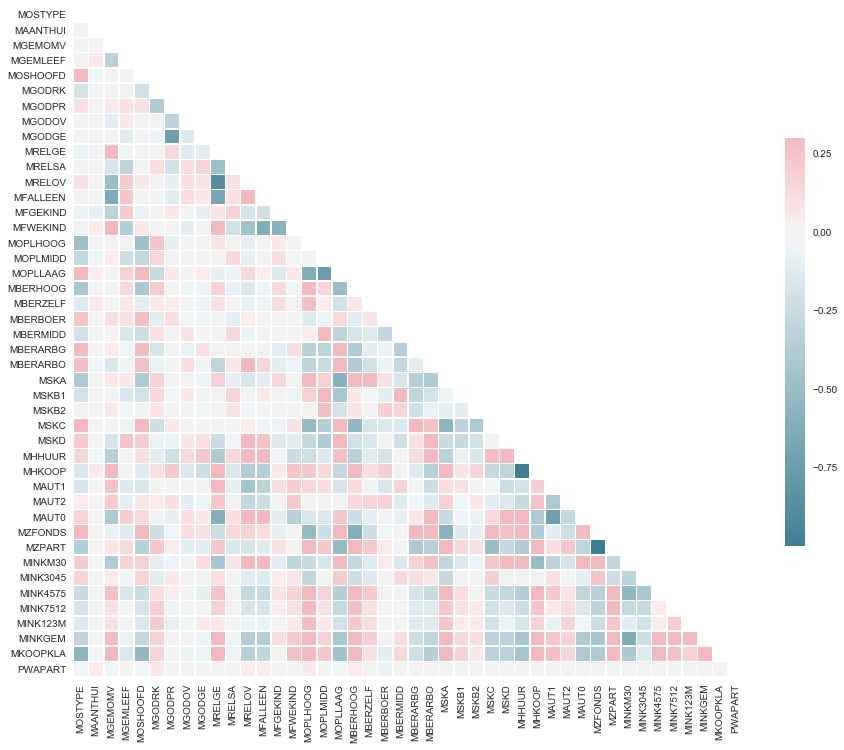

In [11]:
import seaborn as sn
## Correlation Matrix
sn.set(style="white",font_scale = 1)

# Compute the correlation matrix
corr = train.iloc[:,:44].corr()


# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}
            )

## Verifying our above heat map with the correlations threshold = 0.75
Here we will check which correlations are the strongest. This process tells very important points in the dataset

In [75]:
threshold = 0.75
for i in corr.columns:
    index = corr[(abs(corr.loc[:,i]) >= threshold)].index.astype(str)
    if (len(index) > 0) and (index[0] != i):
        print("Correlation between " + index[0] + " & " + i + " = " + (corr.loc[index[0],i].astype(str)))

Correlation between MOSTYPE & MOSHOOFD = 0.9926718735871268
Correlation between MRELGE & MRELOV = -0.88436188763352
Correlation between MGEMOMV & MFWEKIND = 0.7940142458532231
Correlation between MHHUUR & MHKOOP = -0.9995539474452645
Correlation between MZFONDS & MZPART = -0.9992392987669023


## What we learnt from the correlations?
i) MOSTYPE & MOSHOOFD: For eg. Persons who are "High Income, expensive child" are "Successful hedonists" etc.<br>
ii) MRELGE & MRELOV: Persons who are having high marriage count are having low "Other relation"??? Needs checking. <br>
After checking we found out that this factor is true. Its like people having high marriage counts are already fed up with keeping other relations <br>
iii) MGEMOMV & MFWEKIND: Higher the average size of household higher the no. of household with children. Quite obvious.<br>
iv) MHHUUR & MHKOOP: Lower the no. of Rented house higher the no. of Homeowners. Quite obvious.<br>
v) MZFONDS & MZPART: Higher the no. of national health service lower is the no. of private health insurance. Again quite obvious.<br>
<b>Conclusions: We can see that the above points are quite obvious in real life scenarios hence we can drop any one of the above correlated columns to avoid multicollinearity</b>

### Checking 2<sup>nd</sup> point from our correlation matrix conclusions

In [81]:
train.loc[:,['MRELGE','MRELOV']][train.MRELGE >= 5][:10]

,MRELGE,MRELOV
0,7,2
1,6,2
3,5,2
4,7,2
6,7,0
7,7,0
8,6,3
9,7,2
10,7,2
11,7,2


## Data preprocessing according to business scenario
Here we will perform the following
<br>
i) Standardize numerical columns <br>
ii) OneHotEncode categorical columns <br>
OneHotEncoding will be done on the following columns <br>
0 MOSTYPE <br>
3 MGEMLEEF <br>
4 MOSHOOFD <br>
5 MGODRK <br>
43 PWAPART <br>
iii) Apply both the above transformations to test matrix

In [13]:
X_train = train.iloc[:,:44].values
y_train = train.loc[:,'CARAVAN'].values

test = pd.read_csv('ticeval2000.txt',sep='\t',names=headings.Name)
X_test = test.iloc[:,:44].values
y_test = pd.read_csv('tictgts2000.txt',sep='\t',names=['CARAVAN']).loc[:,'CARAVAN'].values

#OneHotEncoding
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[0,3,4,5,43])
X_train = ohe.fit_transform(X_train)
X_test = ohe.transform(X_test)

#Standard scaling
#from sklearn.preprocessing import StandardScaler
#sc = StandardScalar()


In [14]:
X_test.shape

(4000, 109)